<a href="https://colab.research.google.com/github/yanghaemi/openSourceSoftwareDevelopmentProject_LungCancerPredict/blob/main/opensource_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스개발프로젝트
2022040002 양해미

2023년 2학기 기말 프로젝트

<오픈소스 api를 활용한 데이터 수집 및 분석>

## 데이터 수집

### 필요한 module import하기

In [1]:
import numpy as np
import pandas as pd
import json
import urllib
import requests
#서버 족에 request를 보내야 함,  httprequest 라이브러리를 통해서 해야 함 >> urllib

### 오픈 API 호출하기 위한 URL 작성

In [2]:
base_url = 'http://apis.data.go.kr/B551172/LungCancerCoperationInfoService1/getLungCancerCoperationInfo1'

In [3]:
ServiceKey = 'p3jaWle8g7RzfBmMreXGRjpxlisblY6h1L%2FwPjPq8CNjpZRzkiWthdTshx%2F1EtHdeX%2BM7okKkblXw2zVXvayQw%3D%3D'
pageNo = '1'             #페이지 번호
numOfRows= '5000'           #한 페이지 결과 수
Type= 'json'              #요청 자료 형식

In [4]:
total_url = base_url + '?ServiceKey=' + ServiceKey+'&type='+Type+'&numOfRows='+ numOfRows +'&pageNo='+ pageNo

In [5]:
print(total_url)

http://apis.data.go.kr/B551172/LungCancerCoperationInfoService1/getLungCancerCoperationInfo1?ServiceKey=p3jaWle8g7RzfBmMreXGRjpxlisblY6h1L%2FwPjPq8CNjpZRzkiWthdTshx%2F1EtHdeX%2BM7okKkblXw2zVXvayQw%3D%3D&type=json&numOfRows=5000&pageNo=1


In [6]:
#result_req = urllib.request.Request(total_url)
#result_obj = urllib.request.urlopen(result_req)
#request를 보내면 response가 옴
#----------------------------
result = requests.get(total_url)
# url 불러오기

In [7]:
contents = result.text
print(contents) # 출력하면 너무 길다, 출력은 잘 나옴

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 문자열을 json으로 변경하기

In [8]:
#문자열을 json으로 변경
json_ob = json.loads(contents)
print(json_ob)
print(type(json_ob)) #json타입 확인

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 필요한 내용만 남기기

In [9]:
body = json_ob['items']
print(body)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Dataframe으로 변환하기

In [10]:
df = pd.json_normalize(body)
print(df)

     hc_t reason op_lnd hc_msite1_5 hc_msite2_t hc_msite1_4 op_describe  \
0       6      2   None           0        None           0        None   
1       1      2   None           0        None           0        None   
2       2      1   None           0        None           0        None   
3       9      2   None           0        None           0        None   
4       4      1   None           0        None           0        None   
...   ...    ...    ...         ...         ...         ...         ...   
4995    8      1   None           0        None           0        None   
4996    7      1   None           0        None           0        None   
4997    4      1   None           0        None           0        None   
4998    4      1   None           0  peritoneum           0        None   
4999    1      2      0           0        None           0        None   

     hc_msite1_3 hc_msite1_2 hc_msite1_1  ... hc_nsite2_5 hp_nsite3_6  \
0              0          

## 데이터 분석

In [11]:
# 내가 원하는 자료 (중요한 column은 ##)
## SEX : 성별 1) 남자, 2) 여자
## weight : 체중 (kg)
# height : 키 (cm)
## age : 나이
## smoke (흡연) : 1) never smoker, 2) current smoker, 3) ex-smoker(1년이상 금연자) 0) 모름
## smokedose (흡연량) : 하루 흡연량
## smokedur (흡연기간) : 흡연기간 (년단위)
# smokequityr (금연 시작 연도)
## ecog (수행 상태) : 0) 질병이 없던 때와 동일하게 제한없이 활동이 가능한 상태
#                    1) 육체적으로 힘든 활동은 제한되나, 가벼운 일 또는 앉아서 하는 일은 가능(가벼운 집안일, 사무일 등)
#                    2) 자가 간호와 거동(보행)이 가능하나, 일은 불가능한 상태로 깨어있는 시간의 50%이상을 침대 또는 의자를 떠나 생활할 수 있음
#                    3) 자가 간호는 제한적으로 가능하고, 깨어있는 시간의 50% 이상을 침대 또는 의자에서 보내는 경우
#                    4) 어떤 자가 간호도 할 수 없는 무능력한 상태로 완전하게 침대 또는 의자에 제한됨
#                    5) 사망
#                    9) 불명
# hc_t (t인자): 영상기록에서의 T stage 표시 0)Tx, 1)T1a, 2)T1b, 3)T1 NOS, 4)T2a, 5)T2b, 6)T2 NOS, 7)T3, 8)T4, 9) 불명
# hc_tsite8 (폐쇄성 폐렴 유무) : 0) 없음, 1) 있음, 9) 모름
# op_cx (합병증) : 0) 없음, 1)있음, 2) 사망(수술 후 30일 이내), 9) 모름

In [12]:
#df = df[df['smoke'] != '9'] #'모름'인 중요 데이터를 지워줌.
#df = df[df['ecog'] != '9']

In [13]:
df['smoke'] = df['smoke'].map(int)
df['smokedur']=df['smokedur'].fillna(0).astype(int)
df['smokequityr'] = df['smokequityr'].fillna(0).astype(int)
df['hc_t'] = df['hc_t'].map(int)
df['hc_tsite8'] = df['hc_tsite8'].map(int)
#df['op_cx'] = df['op_cx'].map(int)
df['ecog'] = df['smoke'].map(int) #타입이 object라서 map을 사용해서 int로 바꿔줌

###Pandas의 .groupby()

데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처리(혹은 적용)하거나 그룹별 통계량을 확인하고자 할 때 유용한 함수.

📍**그룹별 통계량 확인**

In [14]:
df.groupby('SEX').agg({'smoke': ['mean', 'var'],
                       'AGE': ['mean','count'],
                       'ecog': ['mean', 'var']
                       })
# 1) 남자, 2) 여자

smoke                  AGE            ecog          
         mean       var       mean count      mean       var
SEX                                                         
1    2.371924  1.339676  68.504474  3576  2.371924  1.339676
2    1.294242  1.082019  66.801264  1424  1.294242  1.082019

- 남자 환자의 평균 연령은 66.72,
여자 환자의 평균 연령은 63.83
- 남자 환자의 흡연 분산이 작고, 평균이 2.3인 것을 보면 평균이 흡연자로 보인다.
- 여자 환자의 흡연 분산이 매우 작고, 평균이 1.16인 것을 보면 비흡연자가 많은 것으로 보인다.
- 여자 환자는 퇴원 후 거의 가벼운 집안일과 사무일을 할 수 있는 경우가 많은 것으로 보인다.

<--남자: 504명, 여자: 225명-->

📍**분리된 group 순회**

In [15]:
for (k1, k2), group in df.groupby(['SEX', 'smoke']):
  print((k1,k2))

  display(group.head(5000))

('1', 1)


,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
3,9,2,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,0
7,3,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1
9,9,2,2,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,2,0,1
19,9,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
32,1,2,2,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,7,2,None,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,None,1,1
4943,5,1,None,0,None,0,None,0,0,1,...,0,0,1,2015,0,0,0,None,0,1
4947,7,1,None,0,None,0,None,0,0,0,...,0,0,1,2015,0,0,0,None,0,1
4949,9,1,None,0,None,0,None,0,0,0,...,0,0,1,2015,0,0,0,None,0,1


('1', 2)


,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
10,9,1,None,0,None,0,None,0,0,1,...,0,0,0,2014,0,0,0,None,1,1
11,7,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,1,0,None,1,1
22,9,2,0,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,1,0,0
24,9,1,None,0,None,0,None,0,0,0,...,1,0,0,2014,0,0,0,None,1,1
31,9,1,9,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,7,1,None,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,None,0,2
4990,2,1,None,0,None,1,None,0,0,0,...,0,0,0,2015,0,0,0,None,0,1
4991,7,1,None,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,None,1,1
4994,4,1,2,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,2,0,1


('1', 3)


,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
0,6,2,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
4,4,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1
5,6,2,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1
6,4,2,None,1,None,0,None,1,0,0,...,0,0,0,2014,0,0,0,None,1,1
8,9,2,None,0,None,1,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,2,1,None,0,None,0,None,0,0,1,...,0,0,0,2015,0,0,0,None,1,1
4988,2,2,3,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,2,0,1
4989,4,2,None,0,None,1,None,0,0,0,...,0,0,0,2015,0,0,0,None,1,1
4995,8,1,None,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,None,1,1


('1', 9)


,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
126,7,1,None,0,None,1,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,0
309,7,1,2,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,2,0,1
495,9,2,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,0
559,6,9,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
588,9,9,2,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,4,9,None,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,None,0,1
4847,9,9,None,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,None,0,9
4878,2,1,None,0,None,1,None,0,0,0,...,0,0,0,2015,0,0,0,None,1,1
4923,9,1,None,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,None,1,1


('2', 1)


,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
1,1,2,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1
2,2,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1
13,2,2,2,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,2,0,1
18,9,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,0
21,9,2,None,0,kidney,1,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,8,1,None,1,None,0,None,1,0,0,...,0,0,0,2015,0,0,0,None,1,1
4978,2,2,2,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,2,0,1
4986,2,2,0,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,1,0,1
4992,2,2,2,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,2,0,1


('2', 2)


,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
99,9,1,None,0,None,1,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
176,6,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
228,7,2,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1
350,9,2,None,0,None,0,None,0,0,0,...,0,0,1,2014,0,0,0,None,1,1
376,6,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844,2,1,None,0,None,0,None,0,0,0,...,0,0,1,2015,0,0,0,None,1,1
4851,4,1,None,0,None,0,None,0,0,0,...,0,0,1,2015,0,0,0,None,1,1
4956,8,1,None,0,None,0,None,0,0,0,...,1,0,0,2015,0,0,0,None,0,2
4973,4,1,0,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,1,0,1


('2', 3)


,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
12,5,2,2,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,2,0,1
17,9,9,None,0,None,0,None,0,0,0,...,0,0,1,2014,1,0,0,None,0,0
192,1,2,2,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,2,1,1
363,8,1,None,0,None,1,None,0,0,1,...,0,0,0,2014,0,0,0,None,0,0
365,4,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,2,2,2,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,2,1,1
4647,5,1,None,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,None,0,1
4675,1,2,None,0,None,1,None,0,0,0,...,0,0,0,2015,0,0,0,None,0,2
4822,6,9,2,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,2,1,1


('2', 9)


,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
459,9,1,None,0,None,1,None,0,0,0,...,0,0,1,2014,0,0,0,None,0,0
750,6,9,None,0,spleen,0,None,0,0,1,...,0,0,0,2014,0,0,0,None,0,0
754,8,1,None,0,None,0,None,0,0,1,...,0,0,0,2014,0,0,0,None,1,1
838,9,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,0
878,9,9,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,9
1208,9,9,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,0
1234,9,9,9,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,2,0,0
1288,6,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1
2502,9,9,2,0,None,0,lipoma excision,0,0,0,...,0,0,0,2014,0,0,0,2,0,0
2582,1,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1


- 남자 504명 중 비흡연자는 51명, 흡연자는 245명, 금연한 사람은 208명이다.
- 여자 225명 중 비흡연자는 194명, 흡연자는 25명, 금연한 사람은 6명이다.

📍dict로 변환한 후 키 값으로 조회하여 **그룹별 데이터프레임을 조회**할 수 있다.

In [16]:
#그룹별 데이터프레임을 생성 후 dict에 저장
output = dict(list(df.groupby(['SEX', 'ecog'])))
output.keys()

dict_keys([('1', 1), ('1', 2), ('1', 3), ('1', 9), ('2', 1), ('2', 2), ('2', 3), ('2', 9)])

In [17]:
output[('2', 2)]
# 여자면서 ecog가 2단계인 그룹 조회

,hc_t,reason,op_lnd,hc_msite1_5,hc_msite2_t,hc_msite1_4,op_describe,hc_msite1_3,hc_msite1_2,hc_msite1_1,...,hc_nsite2_5,hp_nsite3_6,hc_nsite2_6,dbyear,hc_nsite2_7,hc_nsite2_8,hp_nsite3_1,op_object,med1_line,tx_com
99,9,1,None,0,None,1,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
176,6,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
228,7,2,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,0,1
350,9,2,None,0,None,0,None,0,0,0,...,0,0,1,2014,0,0,0,None,1,1
376,6,1,None,0,None,0,None,0,0,0,...,0,0,0,2014,0,0,0,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844,2,1,None,0,None,0,None,0,0,0,...,0,0,1,2015,0,0,0,None,1,1
4851,4,1,None,0,None,0,None,0,0,0,...,0,0,1,2015,0,0,0,None,1,1
4956,8,1,None,0,None,0,None,0,0,0,...,1,0,0,2015,0,0,0,None,0,2
4973,4,1,0,0,None,0,None,0,0,0,...,0,0,0,2015,0,0,0,1,0,1


### matplotlib 또는 seaborn을 활용한 그래프 그리기

(그래프 종류는 자유, 그래프 2가지 이상)

In [18]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2,3))

<Figure size 200x300 with 0 Axes>

<Figure size 200x300 with 0 Axes>

<Axes: xlabel='smoke', ylabel='ecog'>

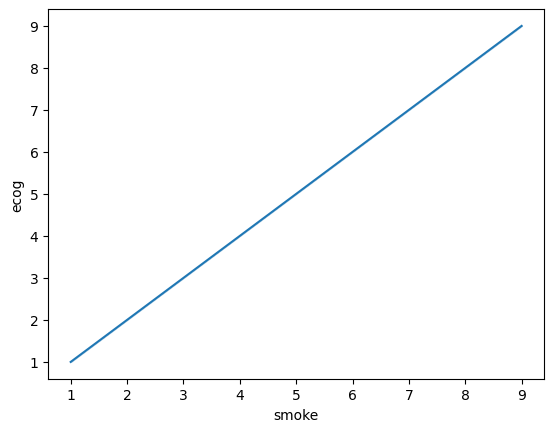

In [19]:
sns.lineplot(data = df, x="smoke", y="ecog")
#lineplot : 선 그래프
#흡연과 ecog의 상관관계를 선 그래프로 나타냄.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoke', ylabel='hc_t'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


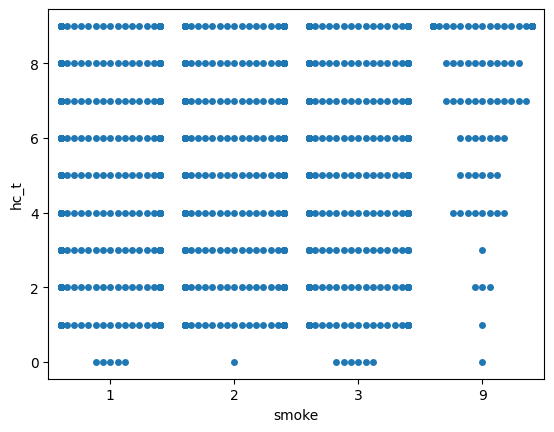

In [20]:
sns.swarmplot(data=df, x="smoke", y="hc_t")

<ipython-input-21-e9fddb5cf6e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hc_t'])


<Axes: xlabel='hc_t', ylabel='Density'>

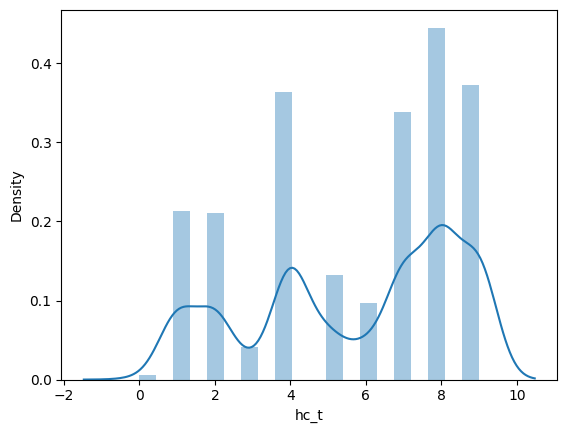

In [21]:
sns.distplot(df['hc_t'])

#T인자의 밀도 비교

### 머신러닝 기법 1개 이상을 사용한 모델 학습 모델 평가 수치 계산

##KNN


In [22]:
from sklearn import preprocessing

In [25]:
# 데이터 자료형 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 328 entries, hc_t to tx_com
dtypes: int64(7), object(321)
memory usage: 12.5+ MB
None


- Step 3 - 속성 선택

In [87]:
ndf = df[['AGE','SEX' ,'smokedur', 'ecog', 'hc_t', 'hc_tsite8']]

In [88]:
print(ndf.head())

   AGE SEX  smokedur  ecog  hc_t  hc_tsite8
0   94   1        40     3     6          0
1   87   2         0     1     1          0
2   84   2         0     1     2          0
3   83   1         0     1     9          9
4   83   1        20     3     4          0


In [89]:
ndf

,AGE,SEX,smokedur,ecog,hc_t,hc_tsite8
0,94,1,40,3,6,0
1,87,2,0,1,1,0
2,84,2,0,1,2,0
3,83,1,0,1,9,9
4,83,1,20,3,4,0
...,...,...,...,...,...,...
4995,72,1,45,3,8,1
4996,72,1,50,2,7,1
4997,72,2,0,1,4,1
4998,71,2,40,2,4,0


- Step 4 - 훈련/검증 데이터 분할

In [90]:
# 데이터셋 구분 - 훈련용(train data)/검증용 (test data)

#속성( 변수 ) 선택
x=ndf[['AGE','SEX','smokedur', 'ecog']] # 설명 변수
y=ndf[['hc_t']] # 예측 변수

In [91]:
x= preprocessing.StandardScaler().fit(x).transform(x)

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

print('train data 개수: ', x_train.shape)
print('test data개수: ', x_test.shape)

train data 개수:  (3500, 4)
test data개수:  (1500, 4)


### 모형 학습 및 검증

In [98]:
#[Step 5] KNN 분류 모형 - sklearn 사용

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성(k=5fh tjfwjd)
knn = KNeighborsClassifier(n_neighbors=9)

# train data를 가지고 모형 학습
knn.fit(x_train, y_train)

y_hat = knn.predict(x_test)

print(y_hat[0:10])


[4 4 8 8 8 4 6 4 9 8]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [99]:
print(y_test.values[0:10])

[[2]
 [3]
 [2]
 [7]
 [9]
 [8]
 [8]
 [4]
 [4]
 [7]]


모형의 예측 능력을 평가하는 방법

In [97]:
# 모형 성능 평가 - confusion matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[ 0  0  1  0  0  0  0  0  1  1]
 [ 1 30 35  3 15  4  2 18 34 21]
 [ 0 21 32  4 20  6  3 12 31  7]
 [ 0  2  6  2  5  0  0  6  5  3]
 [ 1 38 38  8 37 11  3 28 40 32]
 [ 0 17 20  3 14  1  5  8 22 17]
 [ 0  9 14  1  9  0  0  4 14 14]
 [ 2 36 34  3 35 12  3 41 44 22]
 [ 2 50 34 10 43 10  5 39 57 32]
 [ 1 36 41  2 46  6  5 31 45 34]]
